### Name: Akash Yadav
### Reg. No.: 200968184
### Batch: 4

#### Main Objective

The objective is to build a Collaborative Recommender systems on MovieLens dataset with 100,000 movie ratings.
These Recommender systems were built using Pandas operations and by fitting KNN and Cosine similarity

User to User and Item to item based collaborative filtering will be the principles I am going to apply. It involves finding similar movies based on inputs from multiple users in the form of ratings.


- Dataset
    - MovieLens 100K dataset has been used for this project. MovieLens is a rating dataset from the MovieLens website, which has been collected over some period.
- Performing Exploratory Data Analysis on the dataset
- Performing item based Collaborative Filtering using KNN
    - Performing preprocessing to fit the dataset on the model
    
- Performing user based Collaborative Recommender System using Cosine similarity or correlation
    - Finding users who have similar tastes and preferences, based on the past ratings they have given to the same items
    - The similarity between the users is represented in terms of correlation or cosine similarity
    - Weighted sum of the ratings provided by like-minded users for an item to predict what rating may be provided by a user
- API stack
    - FastAPI is used as it provides benefits of Robustness, quick response, intutive and ease of use

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
%matplotlib inline

In [2]:
#Importing the datasets
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
df_movies = pd.read_csv('movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
#Making movie recommendation system model
#Item to Item Collaborative Filtering
df_pred_item = df_ratings.pivot(index = 'movieId', columns = 'userId', values = 'rating')
df_pred_item.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_pred_item.fillna(0, inplace = True)
df_pred_item.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Aggregating the number of users who voted and the number of movies that were voted.
no_user_voted = df_ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = df_ratings.groupby('userId')['rating'].agg('count')

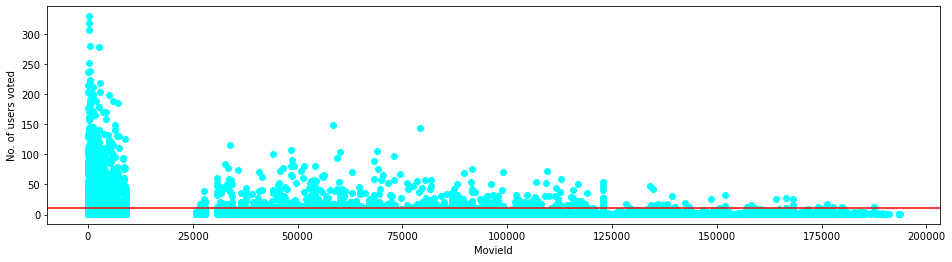

In [7]:
# visualize the number of users who voted with our threshold of 10
f,ax = plt.subplots(1, 1, figsize = (16, 4))
# ratings['rating'].plot(kind = 'hist')
plt.scatter(no_user_voted.index, no_user_voted, color = 'cyan')
plt.axhline(y = 10, color = 'r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [8]:
df_pred_item = df_pred_item.loc[no_user_voted[no_user_voted > 10].index,:]

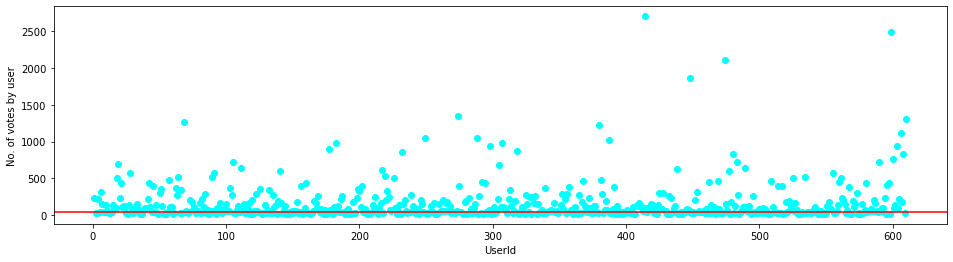

In [9]:
# visualize the number of votes by each user with our threshold of 50
f, ax = plt.subplots(1, 1, figsize = (16, 4))
plt.scatter(no_movies_voted.index, no_movies_voted, color = 'cyan')
plt.axhline(y = 50, color = 'r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [10]:
df_pred_item = df_pred_item.loc[:, no_movies_voted[no_movies_voted > 50].index]
df_pred_item

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#Remove sparcity
csr_data = csr_matrix(df_pred_item.values)
df_pred_item.reset_index(inplace = True)

In [12]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [13]:
#Function to recommend movies
def recommender(movie_name):
    movies_to_reccomend = 10
    movie_list = df_movies[df_movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = df_pred_item[df_pred_item['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx], n_neighbors = movies_to_reccomend + 1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = df_pred_item.iloc[val[0]]['movieId']
            idx = df_movies[df_movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title' : df_movies.iloc[idx]['title'].values[0], 'Distance':val[1]})
        df = pd.DataFrame(recommend_frame, index=range(1, movies_to_reccomend + 1))
        return df
    else:
        return "Movie not found in the dataset"

In [14]:
recommender('Avatar')

,Title,Distance
1,Zombieland (2009),0.398180
2,Inception (2010),0.393521
3,I Am Legend (2007),0.389856
4,"Hangover, The (2009)",0.364190
5,"Dark Knight, The (2008)",0.358937
6,Kung Fu Panda (2008),0.358604
7,Iron Man (2008),0.310893
8,District 9 (2009),0.309947
9,WALL·E (2008),0.306969
10,Up (2009),0.289607


In [15]:
recommender('The Shawshank Redemption')

'Movie not found in the dataset'

In [16]:
#User to user collaborative filtering
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_ratings, test_size = 0.30, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(70585, 4)
(30251, 4)


In [17]:
#Pivot ratings into movie features
ratings_pt = X_train.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)
ratings_pt.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,190221,191005,193565,193571,193573,193579,193581,193583,193585,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#Making a copy of training and testing datasets
temp_train = X_train.copy()
temp_test = X_test.copy()

temp_train['rating'] = temp_train['rating'].apply(lambda x: 0 if x > 0 else 1)
temp_test['rating'] = temp_test['rating'].apply(lambda x: 1 if x > 0 else 0)

In [19]:
#The movies not rated by user is marked as 1 for prediction 
temp_train = temp_train.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(1)

#The movies not rated by user is marked as 0 for evaluation 
temp_test = temp_test.pivot(index ='userId', columns = 'movieId', values = 'rating').fillna(0)

In [20]:
temp_train.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,190221,191005,193565,193571,193573,193579,193581,193583,193585,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [21]:
temp_test.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,187595,189043,189111,189333,189547,189713,190213,190219,193567,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#User-User Similarity Matrix
#Using cosine similarity matrix
from sklearn.metrics.pairwise import cosine_similarity

# User Similarity Matrix using Cosine similarity as a similarity measure between Users
user_similarity = cosine_similarity(ratings_pt)
user_similarity[np.isnan(user_similarity)] = 0
print(user_similarity)
print(user_similarity.shape)

[[1.         0.01799262 0.02914591 ... 0.22586534 0.12184689 0.13241346]
 [0.01799262 1.         0.         ... 0.04299081 0.03472882 0.0625667 ]
 [0.02914591 0.         1.         ... 0.00378273 0.         0.02382229]
 ...
 [0.22586534 0.04299081 0.00378273 ... 1.         0.10982639 0.21962266]
 [0.12184689 0.03472882 0.         ... 0.10982639 1.         0.05416081]
 [0.13241346 0.0625667  0.02382229 ... 0.21962266 0.05416081 1.        ]]
(610, 610)


In [23]:
# Predicting the user ratings on the movies
user_pred_ratings = np.dot(user_similarity, ratings_pt)
user_pred_ratings

array([[8.52008912e+01, 3.99290227e+01, 2.08165173e+01, ...,
        2.81820351e-02, 2.81820351e-02, 1.57425084e-01],
       [2.45531356e+01, 1.05987273e+01, 2.94172315e+00, ...,
        8.74389309e-02, 8.74389309e-02, 4.49741734e-01],
       [4.22670774e+00, 2.11463396e+00, 9.59320674e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.49265311e+01, 4.92867089e+01, 2.12555470e+01, ...,
        2.51644930e-02, 2.51644930e-02, 5.92666313e-01],
       [7.50962548e+01, 3.56578151e+01, 1.17138113e+01, ...,
        0.00000000e+00, 0.00000000e+00, 6.43083908e-02],
       [7.67153155e+01, 3.67625117e+01, 1.11564580e+01, ...,
        2.61466866e-01, 2.61466866e-01, 8.03583319e-01]])

In [24]:
user_pred_ratings.shape

(610, 8566)

In [25]:
# np.multiply for cell-by-cell multiplication 

user_final_ratings = np.multiply(user_pred_ratings, temp_train)
user_final_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,190221,191005,193565,193571,193573,193579,193581,193583,193585,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,39.929023,0.000000,1.220732,10.483532,0.000000,14.082187,2.605186,4.111435,47.981999,...,0.083324,0.036234,0.028182,0.032208,0.032208,0.028182,0.032208,0.028182,0.028182,0.157425
2,24.553136,10.598727,2.941723,0.085473,2.773060,10.458197,2.308815,0.523106,0.588578,11.698251,...,0.054182,0.112421,0.087439,0.099930,0.099930,0.087439,0.099930,0.087439,0.087439,0.449742
3,4.226708,2.114634,0.959321,0.066644,0.308448,2.855740,0.518991,0.105484,0.190006,2.550762,...,0.008707,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,50.832807,23.786786,9.793001,0.706291,6.609481,24.594138,10.881808,1.505819,2.196956,27.970658,...,0.005910,0.065396,0.050864,0.058130,0.058130,0.050864,0.058130,0.050864,0.050864,0.106328
5,60.794262,36.875980,12.358414,2.321889,13.215004,29.323176,14.149193,3.043103,2.351687,47.983608,...,0.108995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103332


In [26]:
user_final_ratings.tail()

movieId,1,2,3,4,5,6,7,8,9,10,...,190221,191005,193565,193571,193573,193579,193581,193583,193585,193609
userId,,,,,,,,,,,,,,,,,,,,,
606,0.00000,34.964158,12.266340,1.116010,8.874253,33.513250,0.000000,2.255907,2.212044,37.230692,...,0.069089,0.087270,0.067876,0.077573,0.077573,0.067876,0.077573,0.067876,0.067876,0.301807
607,55.67579,30.011150,12.521919,1.066428,8.407171,27.892325,10.309332,2.294893,2.937412,35.540635,...,0.033586,0.029268,0.022764,0.026016,0.026016,0.022764,0.026016,0.022764,0.022764,0.131199
608,0.00000,49.286709,0.000000,1.214534,12.865814,47.469073,15.770815,3.598129,4.130638,0.000000,...,0.149587,0.032354,0.025164,0.028759,0.028759,0.025164,0.028759,0.025164,0.025164,0.592666
609,0.00000,35.657815,11.713811,1.642779,12.888383,29.421578,13.934607,2.270113,3.383025,0.000000,...,0.057783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064308
610,0.00000,36.762512,11.156458,0.599295,7.702302,34.714048,8.481314,2.317419,1.998800,36.127867,...,0.057601,0.336172,0.261467,0.298819,0.298819,0.261467,0.298819,0.261467,0.261467,0.803583


In [27]:
user_final_ratings.iloc[42].sort_values(ascending = False)[0:5]

movieId
480    87.452973
150    86.994790
457    81.930003
593    80.807548
1      61.416804
Name: 43, dtype: float64

In [28]:
#Model Evaluation
#Using User-User Similarity
test_user_features = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)
test_user_similarity = cosine_similarity(test_user_features)
test_user_similarity[np.isnan(test_user_similarity)] = 0

print(test_user_similarity)
print("- "*10)
print(test_user_similarity.shape)

[[1.         0.         0.07126637 ... 0.0749648  0.         0.02105064]
 [0.         1.         0.         ... 0.02631254 0.         0.04691426]
 [0.07126637 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.0749648  0.02631254 0.         ... 1.         0.06079015 0.12466251]
 [0.         0.         0.         ... 0.06079015 1.         0.02233952]
 [0.02105064 0.04691426 0.         ... 0.12466251 0.02233952 1.        ]]
- - - - - - - - - - 
(610, 610)


In [29]:
user_predicted_ratings_test = np.dot(test_user_similarity, test_user_features)
user_predicted_ratings_test

array([[ 8.01521825,  3.22701218,  1.71422693, ...,  0.04154912,
         0.        ,  0.        ],
       [ 1.64920152,  0.91304857,  0.02113666, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.07587801,  0.07241296,  0.1867716 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [17.86102484, 10.1363879 ,  4.48304633, ...,  0.0274908 ,
         0.        ,  0.        ],
       [ 3.10351661,  2.6934212 ,  1.20357903, ...,  0.        ,
         0.        ,  0.        ],
       [12.36110509,  5.79632466,  1.96280959, ...,  0.        ,
         0.20526264,  0.23947308]])

In [30]:
test_user_final_rating = np.multiply(user_predicted_ratings_test, temp_test)
test_user_final_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,187595,189043,189111,189333,189547,189713,190213,190219,193567,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,28.077679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df_ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [32]:
# Normalizing values b/w 0.5 & 5
from sklearn.preprocessing import MinMaxScaler

X = test_user_final_rating.copy() 
X = X[X > 0] # only consider non-zero values as 0 means the user haven't rated the movies

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)

print(pred)

[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan 2.28631493        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


In [33]:
# total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

30251

In [34]:
test = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating')
test.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,187595,189043,189111,189333,189547,189713,190213,190219,193567,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# RMSE Score

diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum() 

rmse = np.sqrt(sum_of_squares_err/total_non_nan)
print(rmse)

1.5559782146274688


In [36]:
# Mean absolute error

mae = np.abs(pred - test).sum().sum()/total_non_nan
print(mae)

1.2056509463847997


In [37]:
#Using Item-Item Collaborative filtering
test_item_features = X_test.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
test_item_similarity = cosine_similarity(test_item_features)
test_item_similarity[np.isnan(test_item_similarity)] = 0 

print(test_item_similarity)
print("- "*10)
print(test_item_similarity.shape)

[[1.         0.15732306 0.09932171 ... 0.         0.         0.        ]
 [0.15732306 1.         0.         ... 0.         0.         0.        ]
 [0.09932171 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         1.        ]
 [0.         0.         0.         ... 0.         1.         1.        ]]
- - - - - - - - - - 
(6124, 6124)


In [38]:
item_predicted_ratings_test = np.dot(test_item_features.T, test_item_similarity )
item_predicted_ratings_test

array([[1.90435509e+01, 1.37292388e+01, 1.20305765e+01, ...,
        4.19602222e-01, 0.00000000e+00, 0.00000000e+00],
       [9.33282962e-01, 1.09150271e+00, 6.76481425e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.34037111e+00, 3.35148768e-01, 5.76138709e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.10452867e+01, 6.86734298e+01, 3.74823847e+01, ...,
        4.19602222e-01, 0.00000000e+00, 0.00000000e+00],
       [1.59448344e+00, 1.48111314e+00, 1.51270481e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.50933268e+01, 5.62696921e+01, 2.60485764e+01, ...,
        0.00000000e+00, 8.98355095e+00, 8.98355095e+00]])

In [39]:
test_item_final_rating = np.multiply(item_predicted_ratings_test, temp_test)
test_item_final_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,187595,189043,189111,189333,189547,189713,190213,190219,193567,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,9.480468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
X = test_item_final_rating.copy() 
X = X[X > 0]  #Considering non-zero values, as zero value means the user hasn't rated the movie

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)

print(pred)

[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan 2.06051833        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


In [41]:
# total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

30251

In [42]:
test = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating')
test.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,187595,189043,189111,189333,189547,189713,190213,190219,193567,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# RMSE Score

diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum()

rmse = np.sqrt(sum_of_squares_err/total_non_nan)
print(rmse)

2.512699212653213


In [44]:
# Mean Absolute Error

mae = np.abs(pred - test).sum().sum()/total_non_nan
print(mae)

2.215407217950911


#### Conclusion

For the give dataset, the User-based collaborative filtering has better Mean Absolute Error score so it is a better model.